In [44]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('medical_examination.csv')

In [3]:
data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0


In [8]:
data['overweight'] = (data["weight"] / ((data["height"] / 100) ** 2) > 25).map({True:1, False:0})

In [10]:
data.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [11]:
data['overweight'].unique()

array([0, 1])

In [12]:
data['cholesterol'].unique()

array([1, 3, 2])

In [13]:
data['gluc'].unique()

array([1, 2, 3])

In [17]:
data['cholesterol'] == 1

0         True
1        False
2        False
3         True
4         True
         ...  
69995     True
69996    False
69997    False
69998     True
69999    False
Name: cholesterol, Length: 70000, dtype: bool

In [18]:
def f(data):
    if data == 1:
        return 0
    else:
        return 1
data['cholesterol'].apply(f)

0        0
1        1
2        1
3        0
4        0
        ..
69995    0
69996    1
69997    1
69998    0
69999    1
Name: cholesterol, Length: 70000, dtype: int64

In [19]:
data['gluc'].apply(f)

0        0
1        0
2        0
3        0
4        0
        ..
69995    0
69996    1
69997    0
69998    1
69999    0
Name: gluc, Length: 70000, dtype: int64

In [24]:
!pip install seaborn

     |████████████████████████████████| 288 kB 24 kB/s eta 0:00:01
     |████████████████████████████████| 9.4 MB 115 kB/s eta 0:00:01
  Attempting uninstall: matplotlib
    Found existing installation: matplotlib 3.6.1
    Uninstalling matplotlib-3.6.1:
      Successfully uninstalled matplotlib-3.6.1


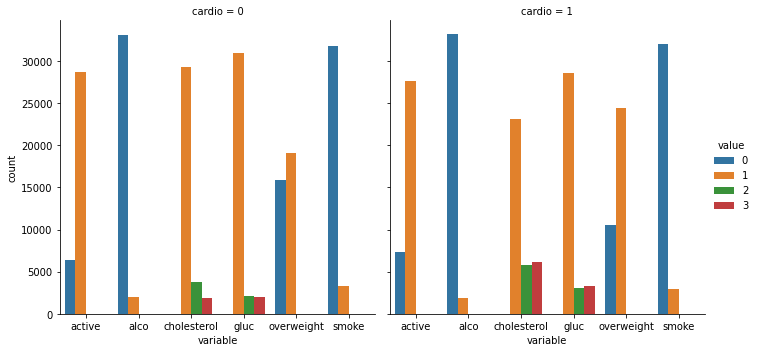

In [30]:
import seaborn as sns


df_cat = pd.melt(data, id_vars=['cardio'], value_vars=['active','alco','cholesterol','gluc','overweight','smoke'])
    

# Draw the catplot with 'sns.catplot()'
sns.catplot(data=df_cat, x='variable',col='cardio',hue='value',kind='count')

In [31]:
df_cat.head()

,cardio,variable,value
0,0,active,1
1,1,active,1
2,1,active,0
3,1,active,1
4,0,active,0


In [33]:
df_heat = data[(data['ap_lo'] <= data['ap_hi']) &
     (data['height'] >= data['height'].quantile(0.025)) &
     (data['height'] <= data['height'].quantile(0.975)) &
     (data['weight'] >= data['weight'].quantile(0.025)) &
     (data['weight'] <= data['weight'].quantile(0.975))]
        
df_heat.head()

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
0,0,18393,2,168,62.0,110,80,1,1,0,0,1,0,0
1,1,20228,1,156,85.0,140,90,3,1,0,0,1,1,1
2,2,18857,1,165,64.0,130,70,3,1,0,0,0,1,0
3,3,17623,2,169,82.0,150,100,1,1,0,0,1,1,1
4,4,17474,1,156,56.0,100,60,1,1,0,0,0,0,0


In [38]:
corr = df_heat.corr()
corr

,id,age,sex,height,weight,ap_hi,ap_lo,cholesterol,gluc,smoke,alco,active,cardio,overweight
id,1.000000,0.002507,0.003426,0.000326,0.000149,0.003492,0.000484,0.005581,0.002242,-0.002732,-0.000708,0.005891,0.003900,-0.000679
age,0.002507,1.000000,-0.018132,-0.076932,0.070168,0.018689,0.153508,0.154642,0.097646,-0.044371,-0.026970,-0.011445,0.240241,0.089573
sex,0.003426,-0.018132,1.000000,0.505785,0.129979,0.005063,0.059947,-0.038756,-0.023419,0.337436,0.168637,0.007864,0.002320,-0.052930
height,0.000326,-0.076932,0.505785,1.000000,0.251503,0.004586,0.017922,-0.065980,-0.028364,0.187830,0.089785,-0.005661,-0.024102,-0.149570
weight,0.000149,0.070168,0.129979,0.251503,1.000000,0.027030,0.227922,0.137705,0.094133,0.056533,0.059917,-0.014430,0.170042,0.655926
ap_hi,0.003492,0.018689,0.005063,0.004586,0.027030,1.000000,0.072803,0.021499,0.010226,-0.001928,0.000769,-0.000222,0.050556,0.017327
ap_lo,0.000484,0.153508,0.059947,0.017922,0.227922,0.072803,1.000000,0.154348,0.067048,0.023275,0.033042,0.001569,0.327181,0.172212
cholesterol,0.005581,0.154642,-0.038756,-0.065980,0.137705,0.021499,0.154348,1.000000,0.451388,0.005696,0.031050,0.007381,0.219090,0.124846
gluc,0.002242,0.097646,-0.023419,-0.028364,0.094133,0.010226,0.067048,0.451388,1.000000,-0.010225,0.005805,-0.007709,0.087621,0.076303
smoke,-0.002732,-0.044371,0.337436,0.187830,0.056533,-0.001928,0.023275,0.005696,-0.010225,1.000000,0.341200,0.026940,-0.020345,-0.003274


In [59]:
mask = np.zeros_like(corr)
mask

(np.zeros_like(corr))[np.triu_indices_from(mask)] = True

In [42]:
mask[np.triu_indices_from(mask)] = True
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

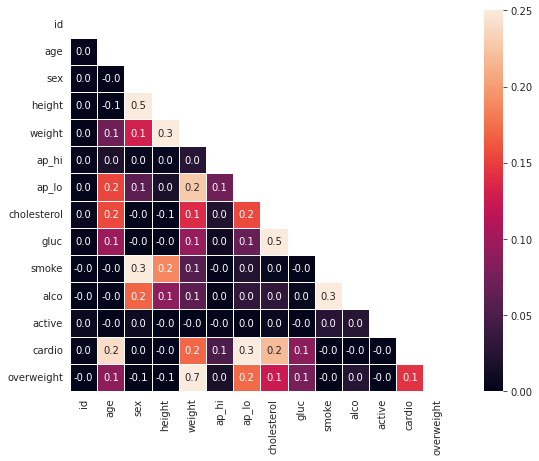

In [46]:
with sns.axes_style("white"):
    f, fig = plt.subplots(figsize=(12, 7))
    fig = sns.heatmap(corr,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=mask)

<AxesSubplot: >

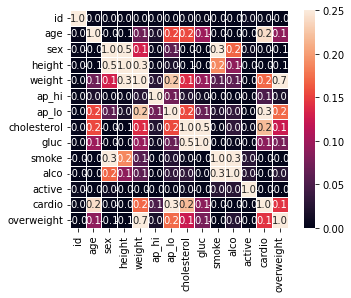

In [48]:
sns.heatmap(corr,vmin=0,vmax=.25,square=True,annot=True,linewidths=.5,fmt=".1f",mask=np.zeros_like(corr))

<AxesSubplot: >

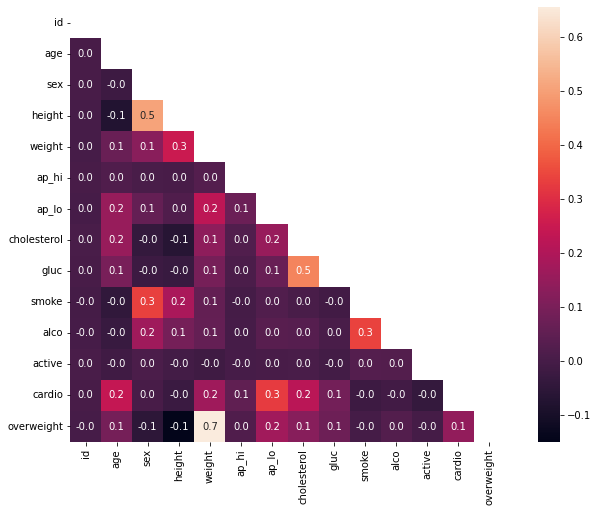

In [57]:
plt.figure(figsize=(12, 8))
sns.heatmap(corr,mask=mask, fmt=".1f" ,square=True, annot=True)

In [120]:
df = pd.DataFrame({'A': {0: 'a', 1: 'b', 2: 'c'},
                    'B': {0: 1, 1: 3, 2: 5},
                    'C': {0: 2, 1: 4, 2: 6}})
df

,A,B,C
0,a,1,2
1,b,3,4
2,c,5,6


In [121]:
df = df.melt(id_vars=['A'], value_vars=['B'])

In [122]:
df['total'] = 2
df = df.groupby(['A', 'variable', 'value'], as_index=False).count()
df

,A,variable,value,total
0,a,B,1,1
1,b,B,3,1
2,c,B,5,1


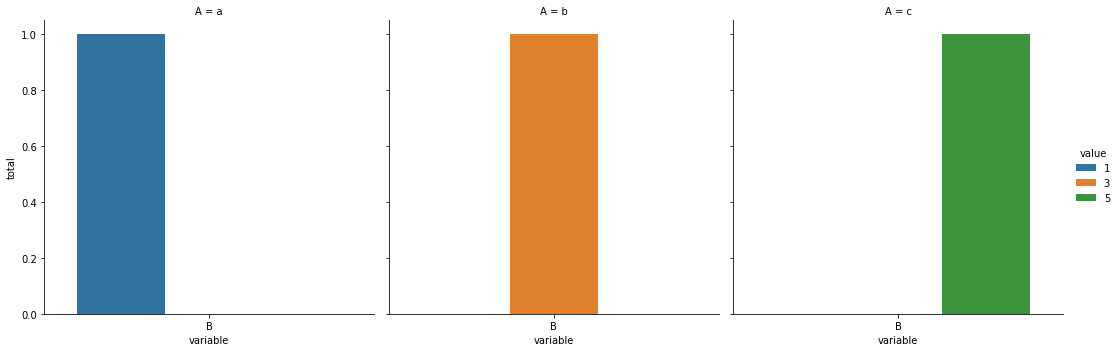

In [123]:
sns.catplot(data=df, x='variable', y='total', col='A',hue='value',kind='bar')